# Ejemplo 1

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importamos las librerias necesarias para procesamiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [7]:
# Cargamos nuestro dataset para explorar los datos
path = '/content/drive/MyDrive/Introducción a AI Blockmakers/2 - Bivariado/diabetes.csv'
df = pd.read_csv(path, sep = ',')
# Visualizamos los 5 primeros datos:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,2
2,8,183.0,NaN,0.0,0.0,23.3,0.672,32.0,1.0,3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,4
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,5
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,6
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,7
7,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0,8
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,9
9,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0,10


#  Limpieza de datos:

In [8]:

print('El tamaño del dataset es:', df.shape)

El tamaño del dataset es: (768, 10)


In [9]:
# Obtenemos información referente al dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   762 non-null    float64
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             764 non-null    float64
 4   Insulin                   760 non-null    float64
 5   BMI                       761 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    float64
 9   ID                        768 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
# Buscamos todos datos nulos o faltantes dentro de cada categoría
df.isna().sum()

Pregnancies                 0
Glucose                     6
BloodPressure               5
SkinThickness               4
Insulin                     8
BMI                         7
DiabetesPedigreeFunction    3
Age                         1
Outcome                     1
ID                          0
dtype: int64

In [11]:
# Desglosamos la estadística de nuestro dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.000,3.000,6.000,17.00
Glucose,762.0,120.948819,32.051474,0.0,99.000,117.000,140.750,199.00
BloodPressure,763.0,69.096986,19.412054,0.0,62.000,72.000,80.000,122.00
SkinThickness,764.0,111.913613,951.512997,0.0,0.000,23.000,33.000,9999.00
Insulin,760.0,78.106579,114.085470,0.0,0.000,22.500,125.000,846.00
BMI,761.0,31.932983,8.064381,0.0,27.300,32.000,36.600,67.10
DiabetesPedigreeFunction,765.0,0.434569,0.405711,-1.0,0.235,0.361,0.613,2.42
Age,767.0,33.256845,11.759580,21.0,24.000,29.000,41.000,81.00
Outcome,767.0,0.348110,0.476682,0.0,0.000,0.000,1.000,1.00
ID,768.0,384.500000,221.846794,1.0,192.750,384.500,576.250,768.00


In [12]:
# Cuenta el número de los diferentes elementos en el data frame
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                52
Insulin                     183
BMI                         250
DiabetesPedigreeFunction    511
Age                          52
Outcome                       2
ID                          768
dtype: int64

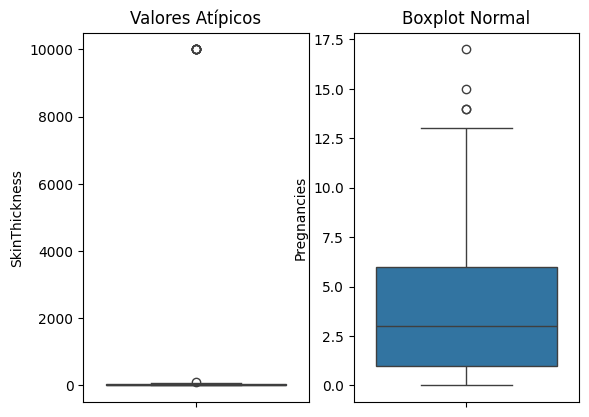

In [13]:
# Veamos el impacto de los datos atípicos en forma gráfica
fig, axes = plt.subplots(1,2)

sns.boxplot(data=df['SkinThickness'], ax = axes[0]).set_title('Valores Atípicos')
sns.boxplot(data=df['Pregnancies'], ax = axes[1]).set_title('Boxplot Normal')

plt.show()

In [14]:
# Aplicamos limpieza de datos para valores faltantes y valores atípicos

# Creamos una copia del data frame para no perder el original
df_clean = df.copy()

# Eliminamos los datos nulos del data frame
df_clean.dropna(inplace=True)

# Eliminamos valores atípicos del dataframe
df_clean = df_clean[df_clean['SkinThickness'] != 9999]
df_clean = df_clean[df_clean['DiabetesPedigreeFunction'] != -1]

In [15]:
# Verificamos que los datos nulos del data frame hayan sido eliminadas
df_clean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
ID                          0
dtype: int64

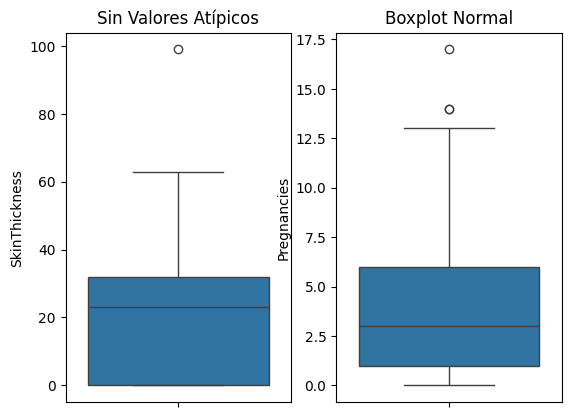

In [16]:
# Veamos el resultado de eliminar los datos atípicos
fig, axes = plt.subplots(1,2)

sns.boxplot(data=df_clean['SkinThickness'], ax = axes[0]).set_title('Sin Valores Atípicos')
sns.boxplot(data=df_clean['Pregnancies'], ax = axes[1]).set_title('Boxplot Normal')

plt.show()

In [17]:
print('El tamaño del dataset limpio es:', df_clean.shape)
df_clean.describe().T

El tamaño del dataset limpio es: (707, 10)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,707.0,3.806223,3.358734,0.0,1.0000,3.00,6.000,17.00
Glucose,707.0,120.314003,31.778453,0.0,99.0000,117.00,139.000,199.00
BloodPressure,707.0,68.864215,19.874998,0.0,62.0000,72.00,80.000,122.00
SkinThickness,707.0,20.164074,16.017031,0.0,0.0000,23.00,32.000,99.00
Insulin,707.0,76.702970,113.466008,0.0,0.0000,18.00,120.000,846.00
BMI,707.0,31.921075,8.186380,0.0,27.3000,32.00,36.550,67.10
DiabetesPedigreeFunction,707.0,0.471977,0.337424,0.0,0.2385,0.37,0.625,2.42
Age,707.0,33.234795,11.742457,21.0,24.0000,29.00,40.000,81.00
Outcome,707.0,0.342291,0.474812,0.0,0.0000,0.00,1.000,1.00
ID,707.0,387.797737,216.906391,1.0,205.0000,390.00,569.500,767.00


In [18]:
# Eliminamos variables (columnas) que no tienen relevancia para el análisis
df_clean = df_clean.drop(columns = ['ID'])

In [19]:
# Observamos que se eliminó la variable "ID"
df_clean.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0
10,4,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0.0


#  Comenzamos nuestro análisis Bivariado:

Text(0.5, 1.0, 'Age vs Pregnancies')

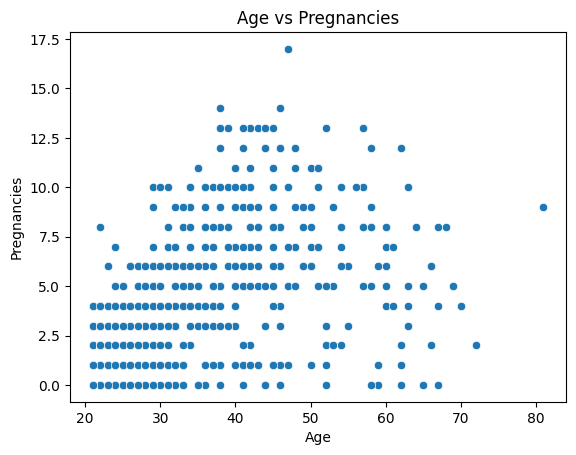

In [20]:
# Comparamos la variable "Age" con "Pregnancies" para analizar su correlacion
sns.scatterplot(x="Age", y="Pregnancies", data=df_clean).set_title("Age vs Pregnancies")

<Axes: xlabel='Age', ylabel='Count'>

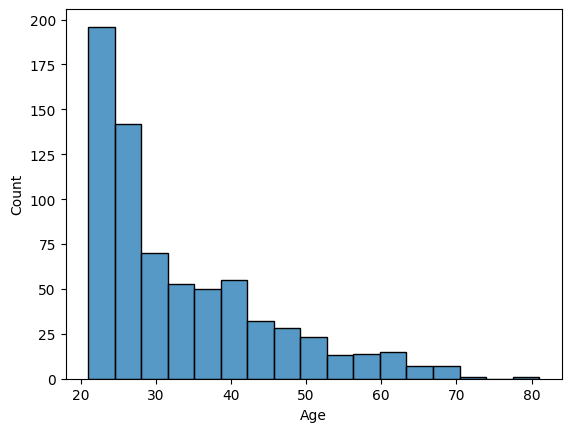

In [21]:
# Observamos la varibale "Age" para determinar que no hay suficientes datos de las personas mayores a 50 años
sns.histplot(df_clean["Age"])

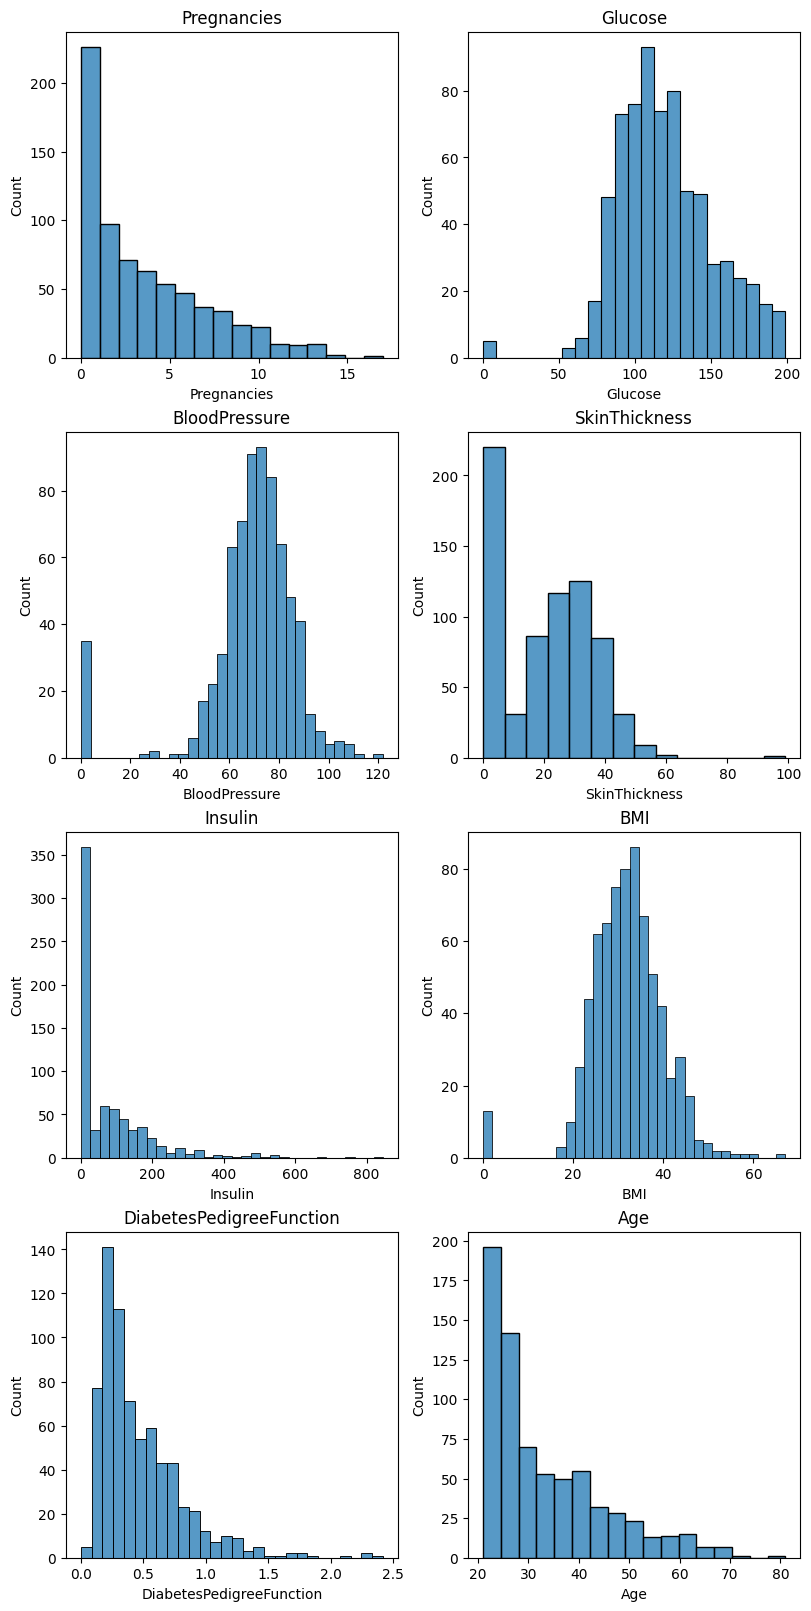

In [22]:
# Features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Creamos los subplots
fig, axes = plt.subplots(4, 2, figsize=(8, 16), layout='constrained')
# acomodamos el array 4,2 de forma que se pueda iterar mas facil: [0 1 2 3 4 5 6 7]
axes = axes.flatten()
# Iteramos entre features y axes para plotear cada gráfica dentro de df_clean
for i, feature in enumerate(features):
    sns.histplot(data=df_clean[feature], ax=axes[i]).set_title(feature)

# Adjust layout and show plot
plt.show()

Text(0.5, 1.0, 'Age vs BPressure')

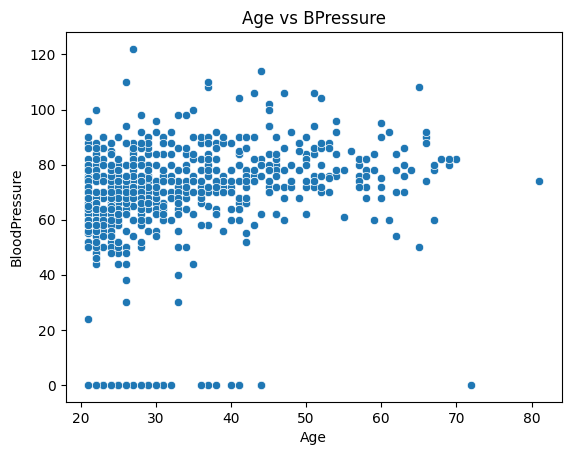

In [23]:
# Comparamos la variable "Age" con "BloodPressure" para analizar su correlacion
sns.scatterplot(x="Age", y="BloodPressure", data=df_clean).set_title("Age vs BPressure")

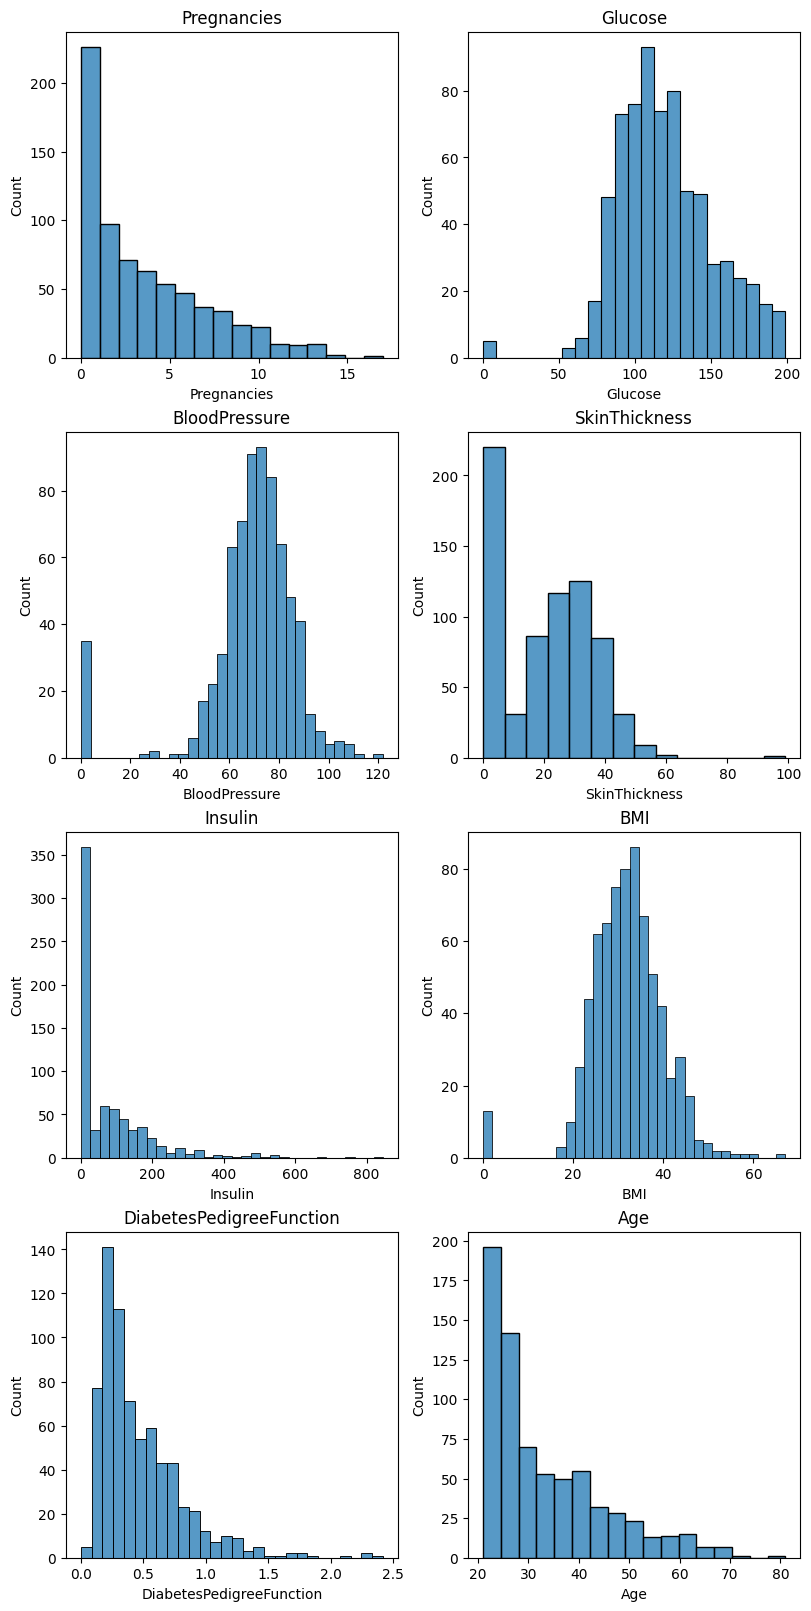

In [24]:
# Features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Creamos los subplots
fig, axes = plt.subplots(4, 2, figsize=(8, 16), layout='constrained')
# acomodamos el array 4,2 de forma que se pueda iterar mas facil: [0 1 2 3 4 5 6 7]
axes = axes.flatten()
# Iteramos entre features y axes para plotear cada gráfica dentro de df_clean
for i, feature in enumerate(features):
    sns.histplot(data=df_clean[feature], ax=axes[i]).set_title(feature)

# Adjust layout and show plot
plt.show()

# Mapeo de correlaciones

In [34]:
# Determinamos correlaciones entre variables
df_corr = df_clean.corr() #Compute pairwise correlation of columns, excluding NA/null values.
df_corr.style.background_gradient(cmap='Greens') #
# BONUS: Lista de colores en CMAPS
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.118267,0.138437,-0.102329,-0.091793,0.013810,-0.037976,0.527040,0.192639
Glucose,0.118267,1.000000,0.149771,0.044254,0.327647,0.219404,0.154561,0.266290,0.453314
BloodPressure,0.138437,0.149771,1.000000,0.201861,0.088412,0.269642,0.039805,0.238133,0.053113
SkinThickness,-0.102329,0.044254,0.201861,1.000000,0.445201,0.376613,0.186700,-0.132819,0.060585
Insulin,-0.091793,0.327647,0.088412,0.445201,1.000000,0.203049,0.183709,-0.061012,0.122408
BMI,0.013810,0.219404,0.269642,0.376613,0.203049,1.000000,0.147090,0.027535,0.280408
DiabetesPedigreeFunction,-0.037976,0.154561,0.039805,0.186700,0.183709,0.147090,1.000000,0.028577,0.179422
Age,0.527040,0.266290,0.238133,-0.132819,-0.061012,0.027535,0.028577,1.000000,0.219796
Outcome,0.192639,0.453314,0.053113,0.060585,0.122408,0.280408,0.179422,0.219796,1.000000


Text(0.5, 1.0, 'Glucose vs Outcome')

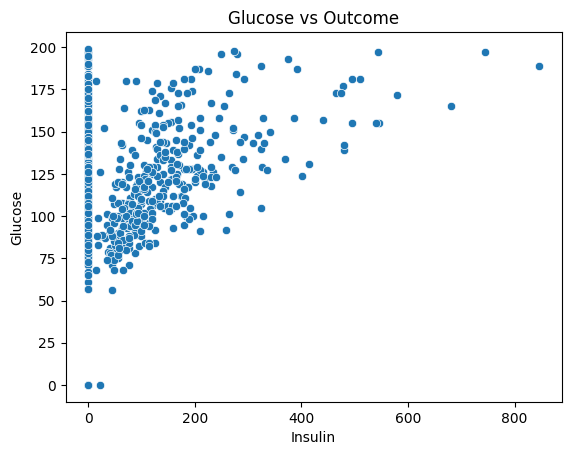

In [29]:
# Comparamos la variable "Age" con "BloodPressure" para analizar su correlacion
sns.scatterplot(x="Insulin", y="Glucose", data=df_clean).set_title("Glucose vs Outcome")

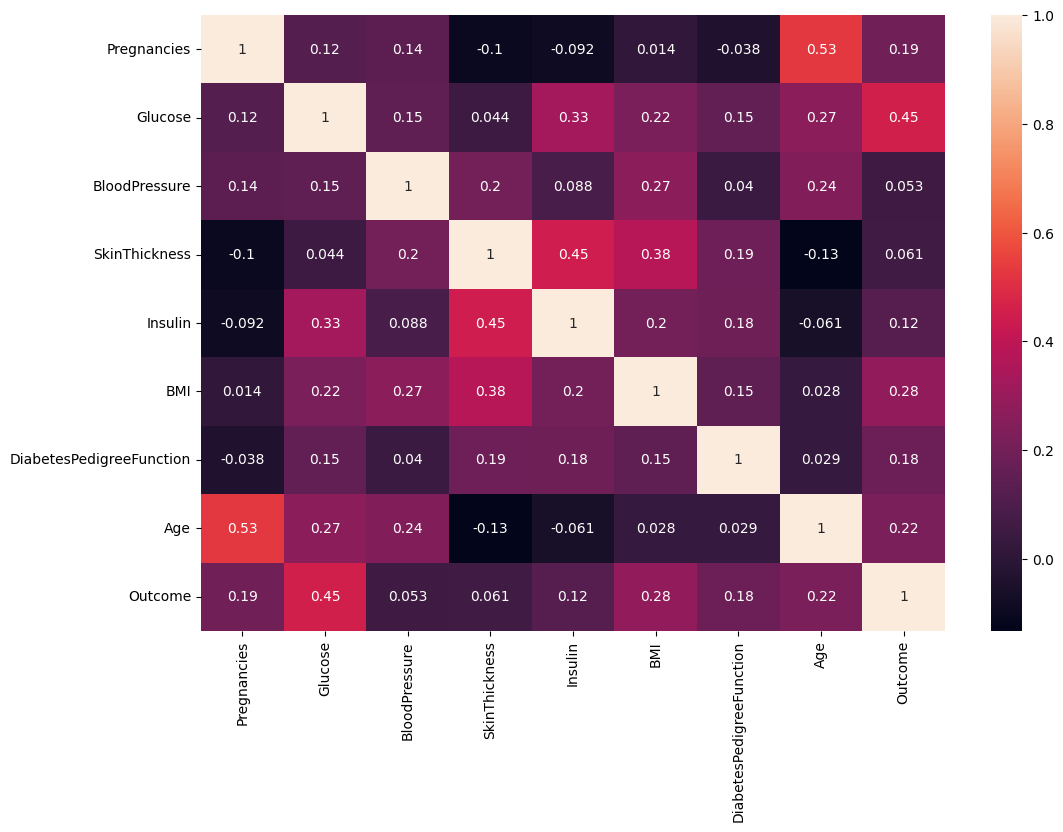

In [ ]:
#Correlaciones
plt.figure(figsize=(12, 8))

df_corr = df_clean.corr()
sns.heatmap(df_corr,
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

In [ ]:
df_clean.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

In [ ]:
# Determinamos correlaciones entre variables
df_corr = df_clean.corr() #Compute pairwise correlation of columns, excluding NA/null values.
df_corr.style.background_gradient(cmap='Greens') #
# BONUS: Lista de colores en CMAPS
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.118267,0.138437,-0.102329,-0.091793,0.013810,-0.037976,0.527040,0.192639
Glucose,0.118267,1.000000,0.149771,0.044254,0.327647,0.219404,0.154561,0.266290,0.453314
BloodPressure,0.138437,0.149771,1.000000,0.201861,0.088412,0.269642,0.039805,0.238133,0.053113
SkinThickness,-0.102329,0.044254,0.201861,1.000000,0.445201,0.376613,0.186700,-0.132819,0.060585
Insulin,-0.091793,0.327647,0.088412,0.445201,1.000000,0.203049,0.183709,-0.061012,0.122408
BMI,0.013810,0.219404,0.269642,0.376613,0.203049,1.000000,0.147090,0.027535,0.280408
DPF,-0.037976,0.154561,0.039805,0.186700,0.183709,0.147090,1.000000,0.028577,0.179422
Age,0.527040,0.266290,0.238133,-0.132819,-0.061012,0.027535,0.028577,1.000000,0.219796
Outcome,0.192639,0.453314,0.053113,0.060585,0.122408,0.280408,0.179422,0.219796,1.000000


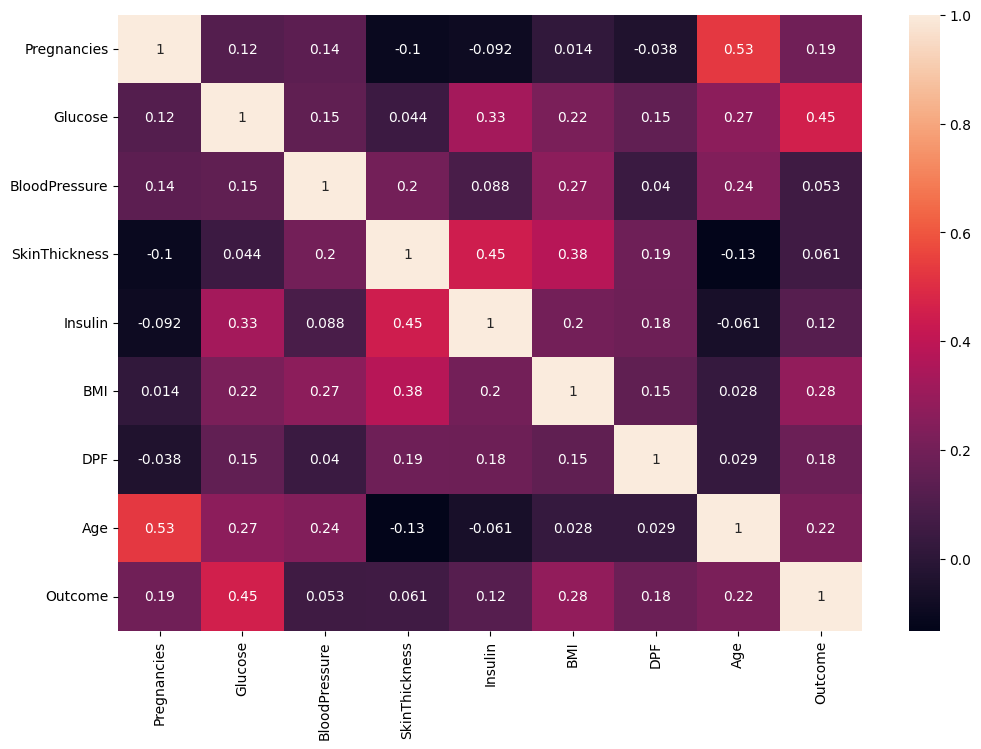

In [ ]:
#Correlaciones
plt.figure(figsize=(12, 8))

df_corr = df_clean.corr()
sns.heatmap(df_corr,
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

<Axes: xlabel='SkinThickness', ylabel='BMI'>

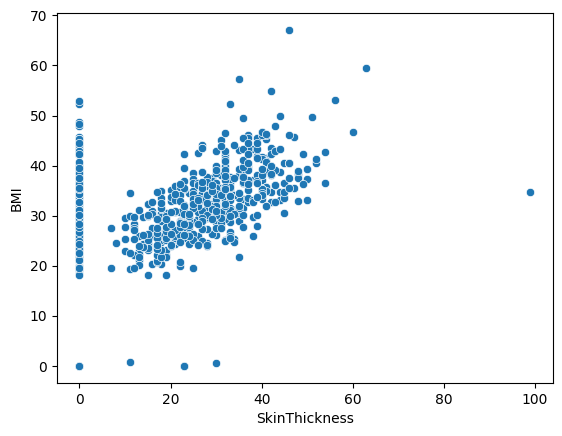

In [ ]:
# Comparamos variables con correlaciones altas
sns.scatterplot(x="SkinThickness", y="BMI", data=df_clean)

<Axes: xlabel='SkinThickness', ylabel='BMI'>

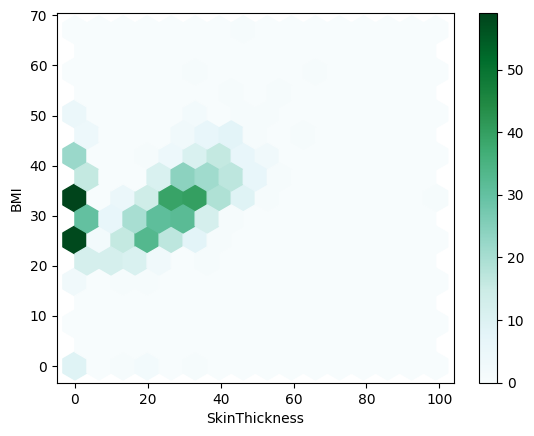

In [ ]:
# Comparamos variables en un hexplot
df_clean.plot.hexbin(x='SkinThickness', y='BMI', gridsize=15)

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

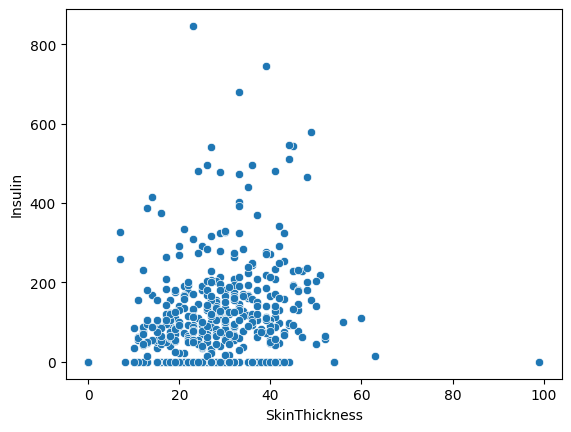

In [ ]:
sns.scatterplot(x="SkinThickness", y="Insulin", data=df_clean)

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

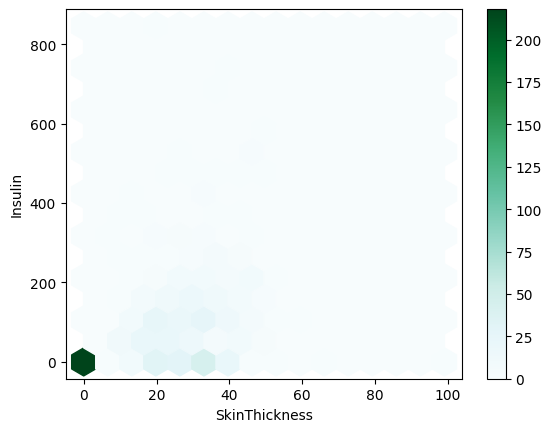

In [ ]:
df_clean.plot.hexbin(x='SkinThickness', y='Insulin', gridsize=15)

<Axes: xlabel='Insulin', ylabel='Count'>

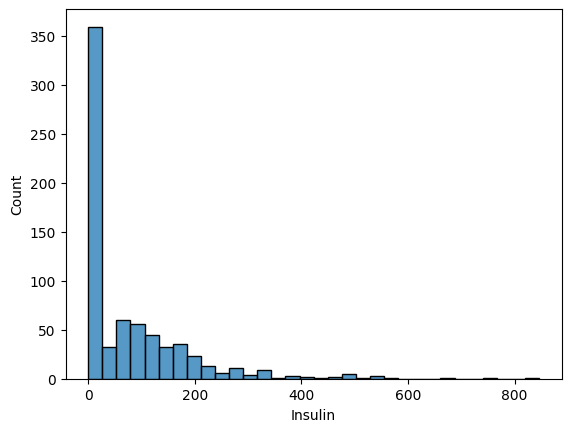

In [ ]:
sns.histplot(df_clean['Insulin'])

# Análisis Multivariado

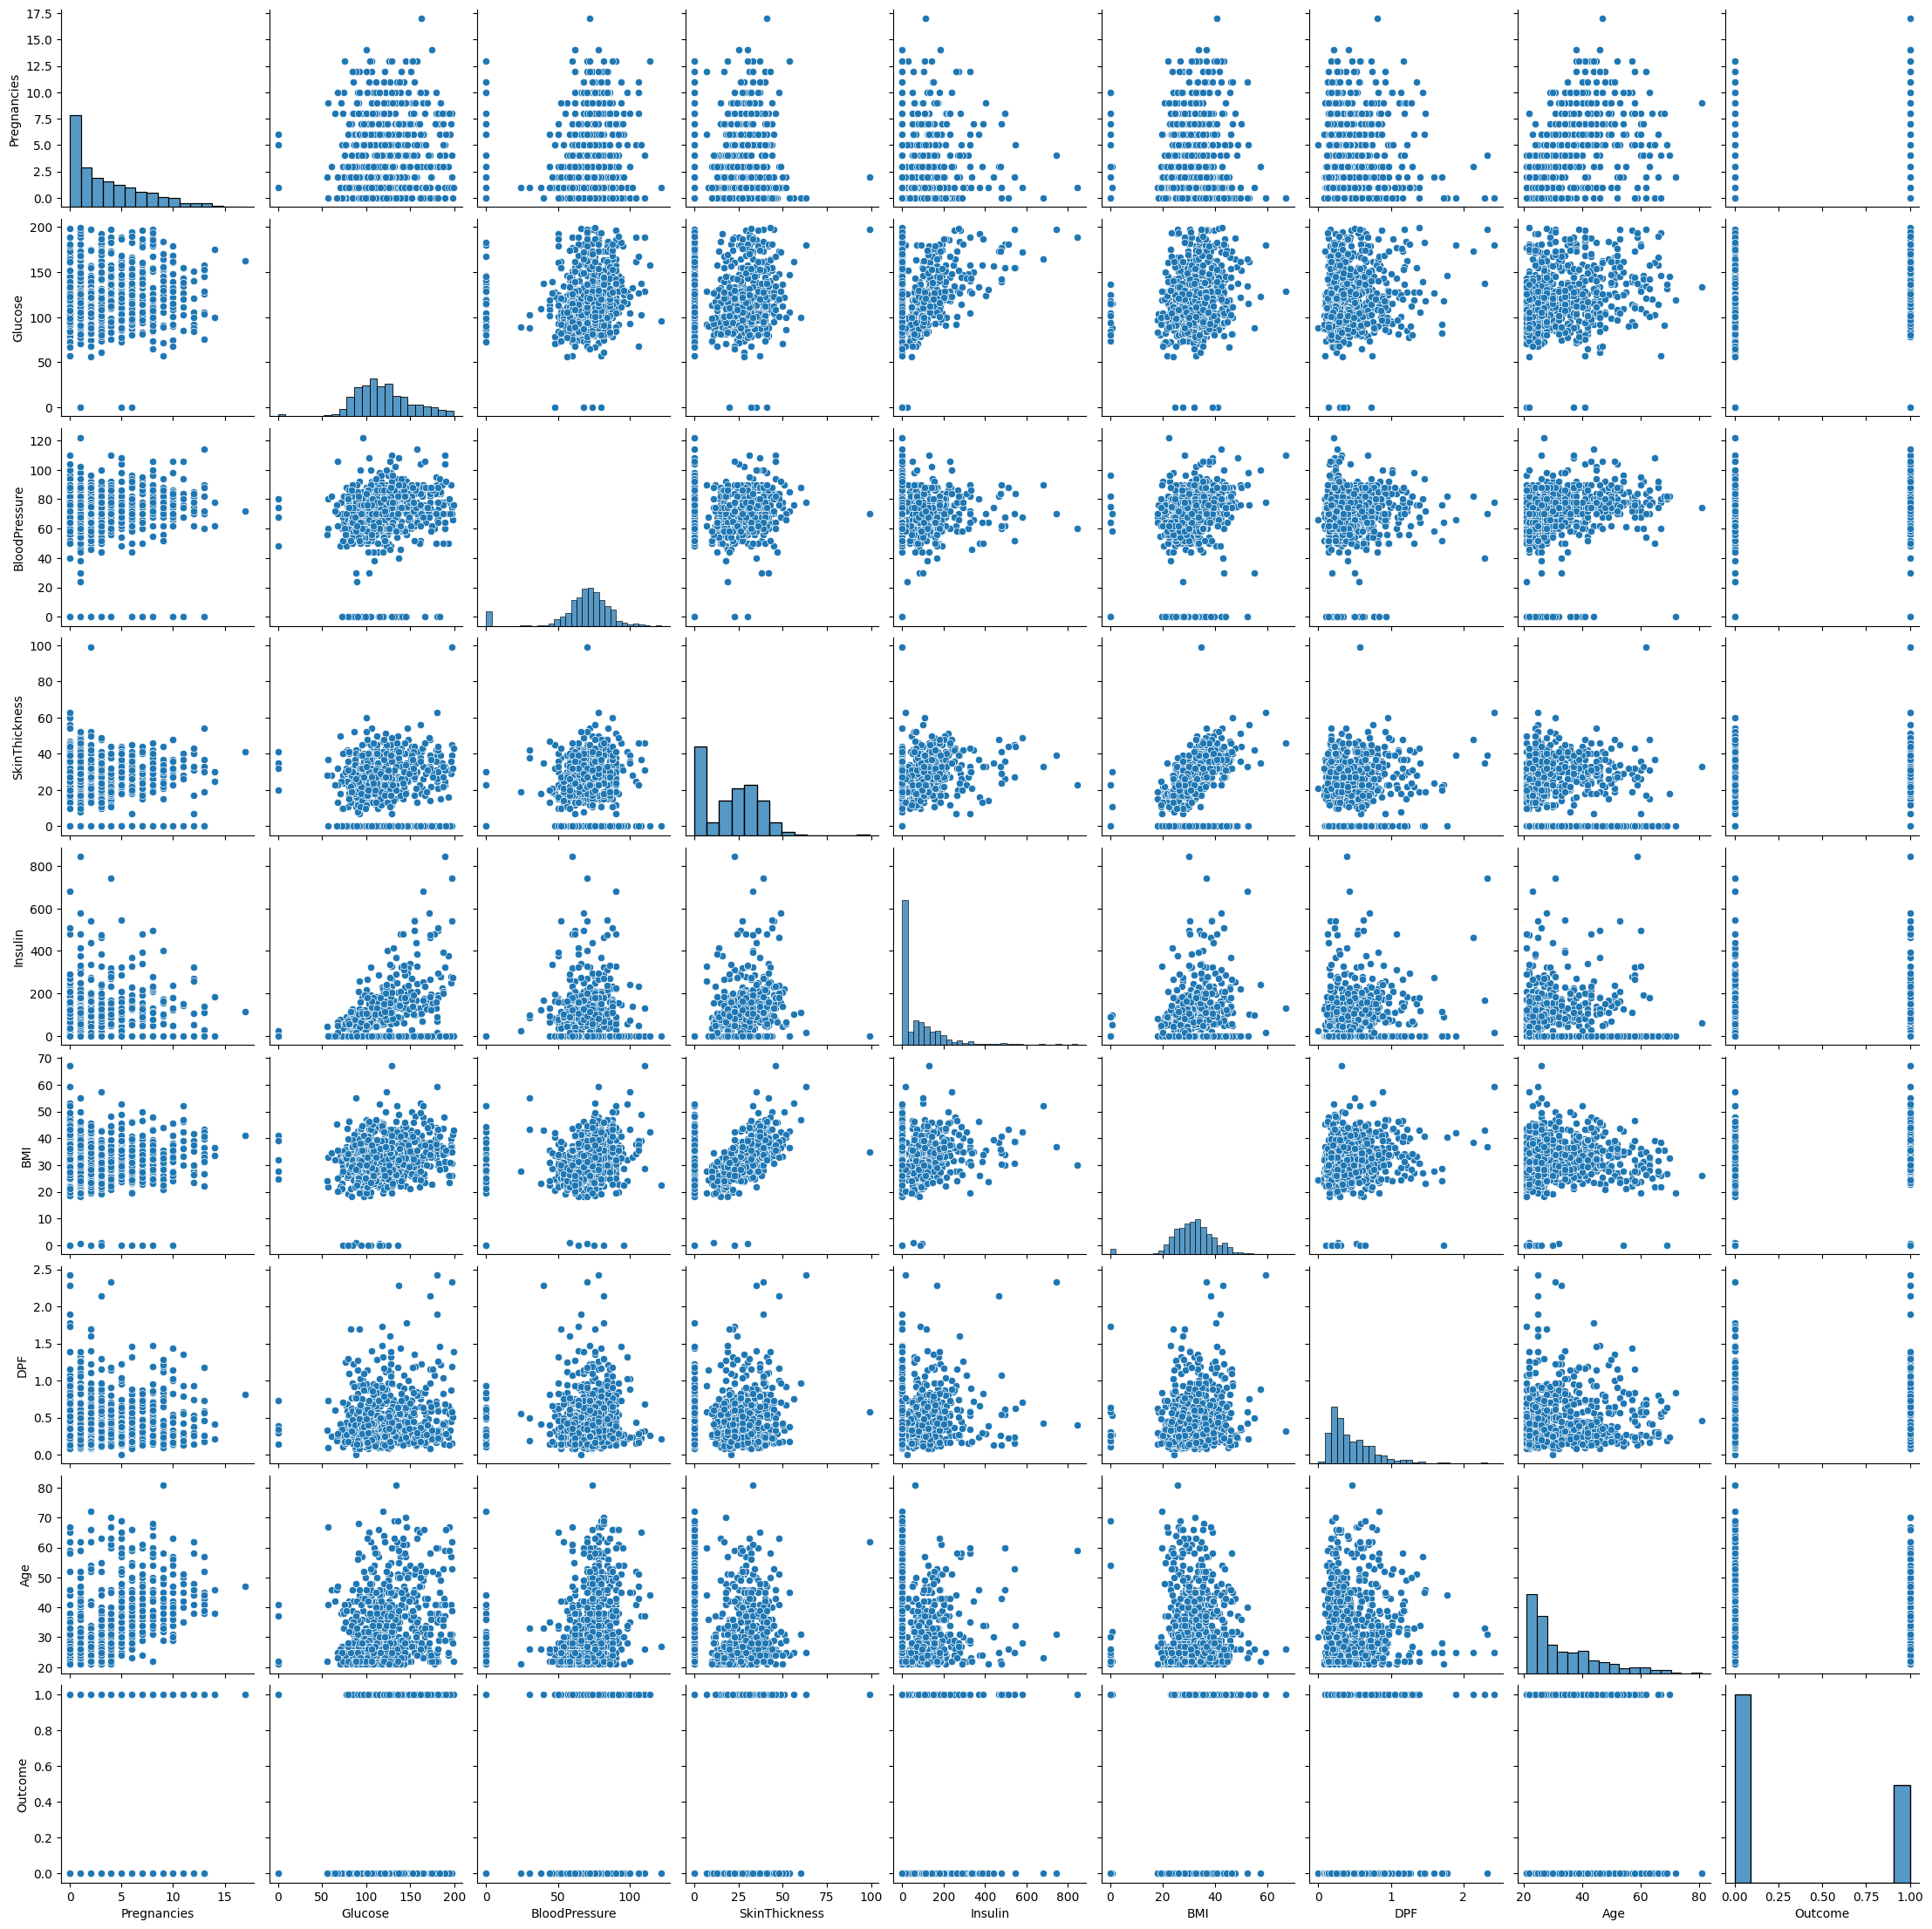

In [ ]:
sns.pairplot(df_clean)

¿Qué variables se correlacionan entre si? Explica por lo menos 3 correlaciones que hayas encontrado.

# Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from yellowbrick.target import FeatureCorrelation

In [ ]:
escalador = RobustScaler()
escalador.fit(df_clean)

RobustScaler()

In [ ]:
df_escalado = pd.DataFrame(escalador.transform(df_clean), columns=df_clean.columns)
df_escalado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,0.6,0.775,0.000000,0.37500,-0.150000,0.172973,0.664942,1.3125,1.0
1,-0.4,-0.800,-0.333333,0.18750,-0.150000,-0.583784,-0.049159,0.1250,0.0
2,-0.4,-0.700,-0.333333,0.00000,0.633333,-0.421622,-0.525226,-0.5000,0.0
3,-0.6,0.500,-1.777778,0.37500,1.250000,1.200000,4.962484,0.2500,1.0
4,0.4,-0.025,0.111111,-0.71875,-0.150000,-0.691892,-0.437257,0.0625,0.0
...,...,...,...,...,...,...,...,...,...
702,1.2,-0.700,-0.555556,-0.71875,-0.150000,-1.027027,-0.589909,0.2500,0.0
703,1.4,-0.400,0.222222,0.78125,1.350000,0.097297,-0.514877,2.1250,0.0
704,-0.2,0.125,-0.111111,0.12500,-0.150000,0.518919,-0.077620,-0.1250,0.0
705,0.4,0.100,0.000000,0.00000,0.783333,-0.627027,-0.323415,0.0625,0.0


In [ ]:
df_escalado.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

X = df_escalado[features]
y = df_escalado[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 10)
scores = pd.DataFrame(cross_validate(rfc, X_train, y_train, cv=10, return_train_score=True))

print("Score promedio de entrenamiento =", scores['train_score'].mean())
print("Score promedio de validación =", scores['test_score'].mean())
scores

Score promedio de entrenamiento = 0.7889961016660737
Score promedio de validación = 0.7399122807017544


,fit_time,score_time,test_score,train_score
0,0.010736,0.002014,0.807018,0.795276
1,0.011082,0.002001,0.684211,0.814961
2,0.010040,0.001803,0.719298,0.785433
3,0.010515,0.002001,0.807018,0.789370
4,0.009028,0.002504,0.631579,0.805118
5,0.009023,0.002011,0.767857,0.777996
6,0.009026,0.002000,0.714286,0.789784
7,0.009940,0.002001,0.821429,0.764244
8,0.009912,0.002331,0.642857,0.789784
9,0.011710,0.002001,0.803571,0.777996


0.8098591549295775
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       102
         1.0       0.71      0.55      0.62        40

    accuracy                           0.81       142
   macro avg       0.77      0.73      0.75       142
weighted avg       0.80      0.81      0.80       142



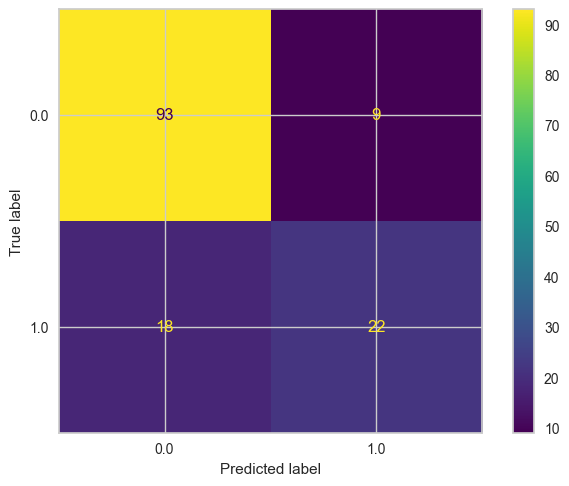

In [ ]:
rfc_model = rfc.fit(X_train,y_train)
print(rfc_model.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))

Juega con los parámetros para encontrar un modelo que eleve el score de los resultados

In [ ]:
rfc = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 100)
scores = pd.DataFrame(cross_validate(rfc, X_train, y_train, cv=10, return_train_score=True))

print("Score promedio de entrenamiento =", scores['train_score'].mean())
print("Score promedio de validación =", scores['test_score'].mean())
scores

Score promedio de entrenamiento = 0.7909584177714525
Score promedio de validación = 0.7486842105263157


,fit_time,score_time,test_score,train_score
0,0.091528,0.007003,0.807018,0.799213
1,0.083067,0.005522,0.666667,0.791339
2,0.084248,0.006518,0.719298,0.807087
3,0.083893,0.006026,0.824561,0.785433
4,0.090029,0.006001,0.719298,0.795276
5,0.084260,0.007002,0.767857,0.787819
6,0.083487,0.007059,0.678571,0.795678
7,0.085196,0.006002,0.803571,0.774067
8,0.088643,0.009034,0.696429,0.791749
9,0.091834,0.006423,0.803571,0.781925


Con los parámetros que obtuviste, ¿consideras que el modelo está listo para generar decisiones de negocio? ¿que observas al meter parámetros con valores más elevados a los definidos inicialmente?